In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

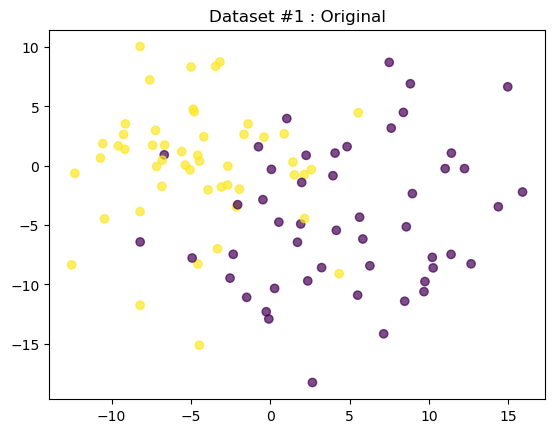

In [184]:
X1, label1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

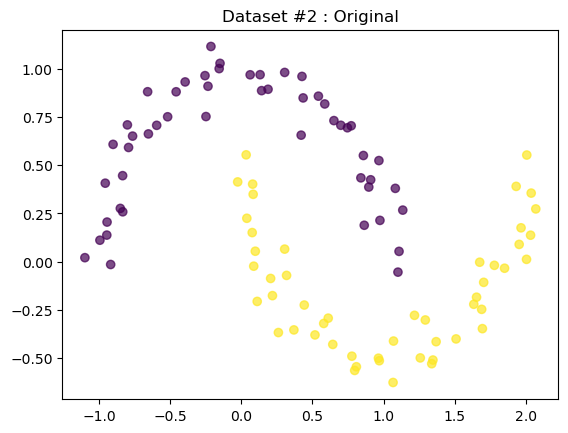

In [186]:
X2, label2 = make_moons(n_samples=100, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

F:\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


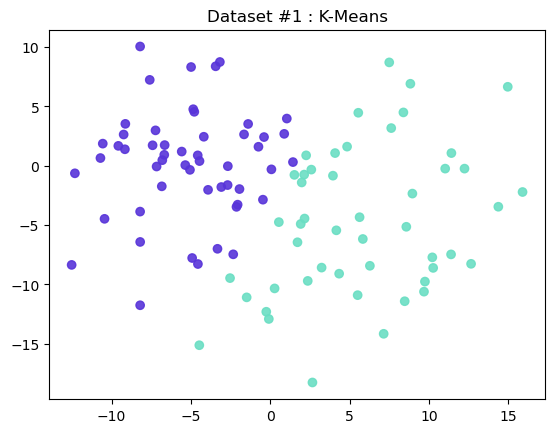

In [188]:
kmeans = KMeans(n_clusters=2,random_state=123)                 
kmeans.fit(X1)                                                 
myColors = {0:'#5834d9',1:'#6adec3'}                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.9 )    
plt.title('Dataset #1 : K-Means')
plt.show()

F:\MachineLearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


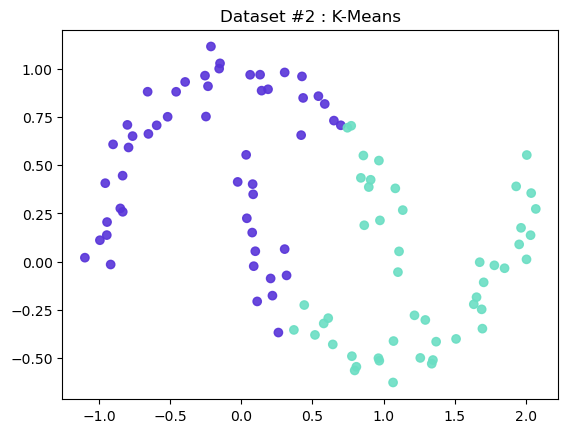

In [190]:
kmeans = KMeans(n_clusters=2,random_state=123)                 
kmeans.fit(X2)                                                   
myColors = {0:'#5834d9',1:'#6adec3'}                                 
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.9 )
plt.title('Dataset #2 : K-Means')
plt.show()

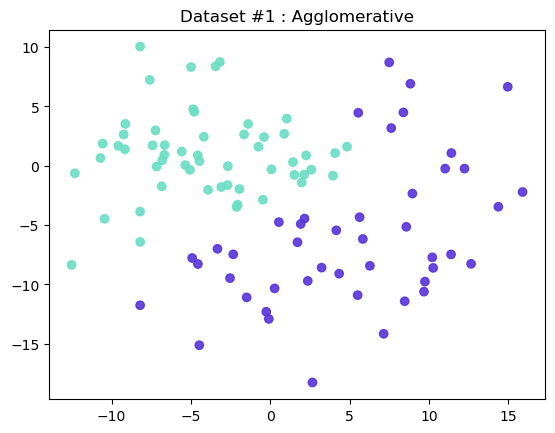

In [192]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'#5834d9',1:'#6adec3'}                                 
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.9 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

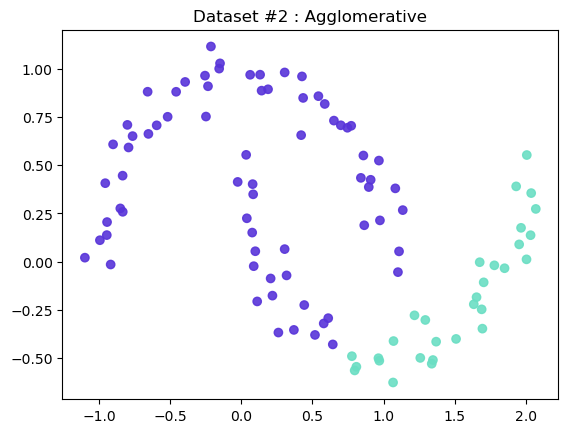

In [194]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'#5834d9',1:'#6adec3'}                               
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.9 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

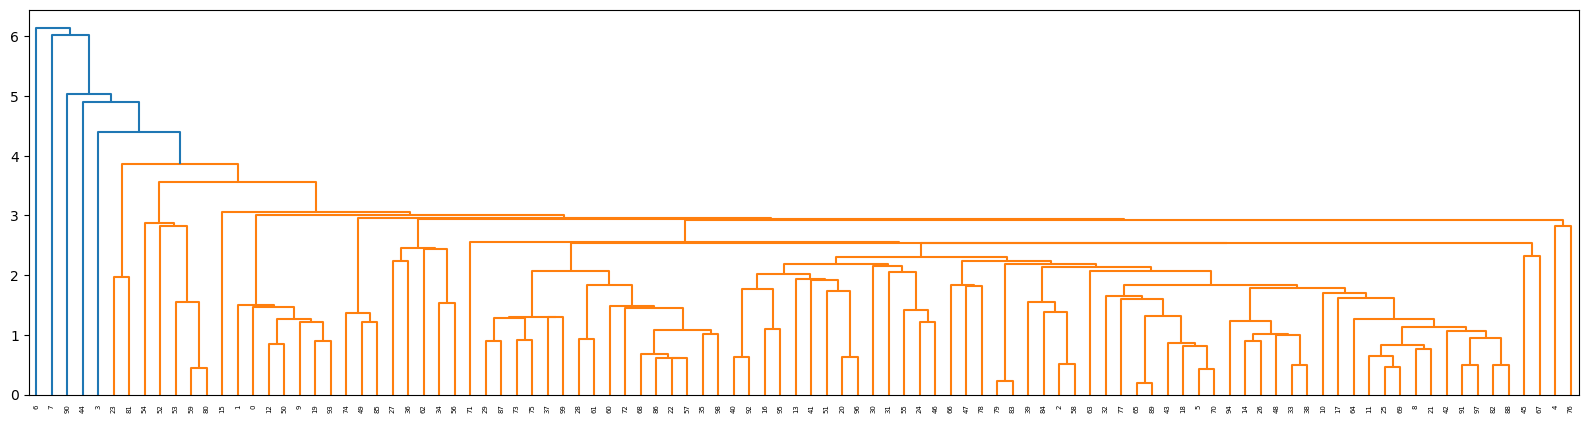

In [196]:
myLinkage = linkage(X1,method='single')       
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [198]:
labels = fcluster(myLinkage, 5, criterion='distance')                    
pd.Series(labels).value_counts()

1    97
4     1
3     1
2     1
Name: count, dtype: int64

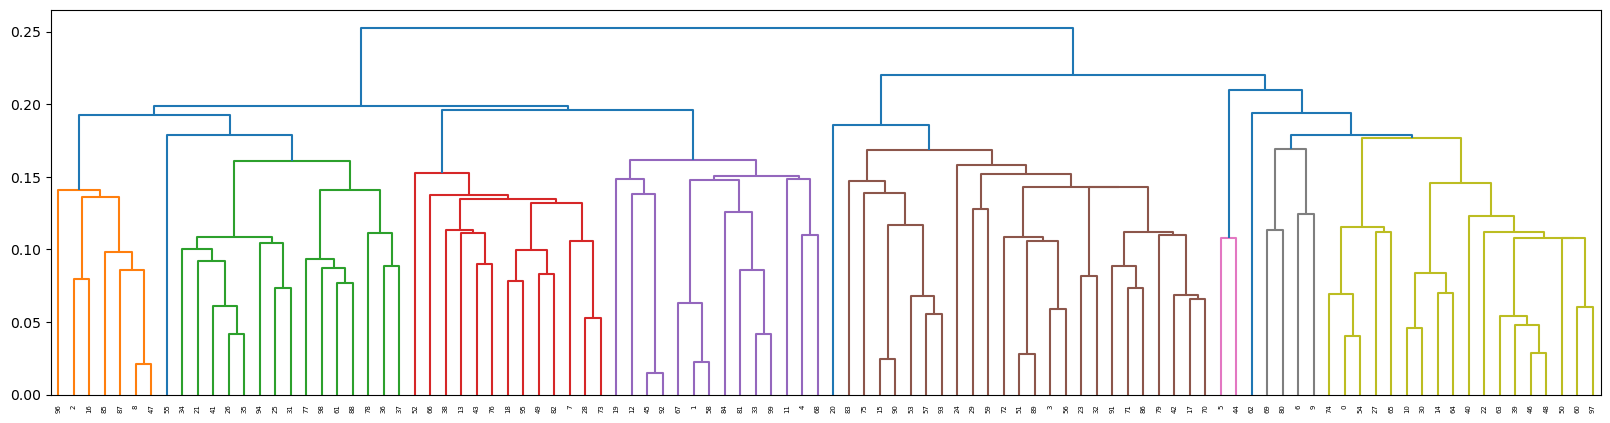

In [200]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [202]:
labels = fcluster(myLinkage, 0.24, criterion='distance')                 
pd.Series(labels).value_counts()

2    50
1    50
Name: count, dtype: int64

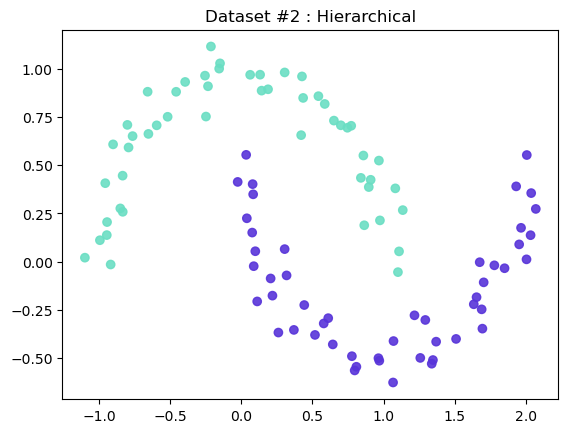

In [204]:
myColors = {1:'#5834d9',2:'#6adec3'}                                               
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(labels).apply(lambda x: myColors[x]), alpha=0.9 )   
plt.title('Dataset #2 : Hierarchical')
plt.show()

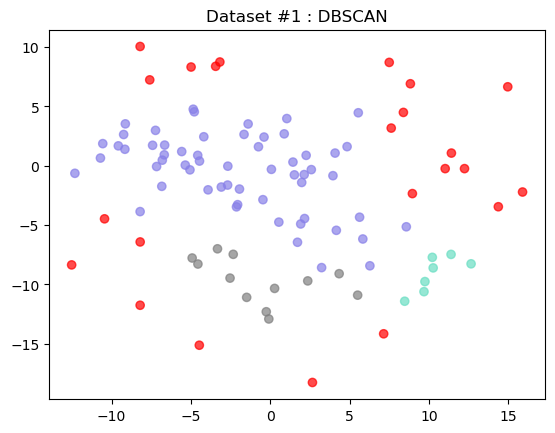

In [208]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'#8880e8',1:'#6adec3'}
default_color = 'gray'
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors.get(x, default_color)), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

In [210]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'#8880e8',1:'#6adec3'}  
default_color = 'gray'
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.9 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

KeyError: 3